In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import re

In [2]:
df = pd.read_csv('modeling_data/data.csv')

In [3]:
df.head()

,URLs,Headline,Body,Label
0,http://www.bbc.com/news/world-us-canada-414191...,Four ways Bob Corker skewered Donald Trump,Image copyright Getty Images\nOn Sunday mornin...,1
1,https://www.reuters.com/article/us-filmfestiva...,Linklater's war veteran comedy speaks to moder...,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1
2,https://www.nytimes.com/2017/10/09/us/politics...,Trump’s Fight With Corker Jeopardizes His Legi...,The feud broke into public view last week when...,1
3,https://www.reuters.com/article/us-mexico-oil-...,Egypt's Cheiron wins tie-up with Pemex for Mex...,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,1
4,http://www.cnn.com/videos/cnnmoney/2017/10/08/...,Jason Aldean opens 'SNL' with Vegas tribute,"Country singer Jason Aldean, who was performin...",1


In [4]:
df.tail()

,URLs,Headline,Body,Label
4004,http://beforeitsnews.com/sports/2017/09/trends...,Trends to Watch,Trends to Watch\n% of readers think this story...,0
4005,http://beforeitsnews.com/u-s-politics/2017/10/...,Trump Jr. Is Soon To Give A 30-Minute Speech F...,Trump Jr. Is Soon To Give A 30-Minute Speech F...,0
4006,https://www.activistpost.com/2017/09/ron-paul-...,"Ron Paul on Trump, Anarchism & the AltRight",NaN,0
4007,https://www.reuters.com/article/us-china-pharm...,China to accept overseas trial data in bid to ...,SHANGHAI (Reuters) - China said it plans to ac...,1
4008,http://beforeitsnews.com/u-s-politics/2017/10/...,Vice President Mike Pence Leaves NFL Game Beca...,Vice President Mike Pence Leaves NFL Game Beca...,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   URLs      4009 non-null   object
 1   Headline  4009 non-null   object
 2   Body      3988 non-null   object
 3   Label     4009 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 125.4+ KB


In [6]:
df[df['Body'].isnull()]

,URLs,Headline,Body,Label
247,https://www.nytimes.com/interactive/2017/10/12...,Read Al Green's Resolution to Impeach Donald T...,NaN,1
269,https://www.nytimes.com/2017/10/10/magazine/th...,The Prophet of Germany’s New Right,NaN,1
325,http://edition.cnn.com/interactive/2017/10/mid...,"Hunting the terror group from 70,000ft",NaN,1
395,http://beforeitsnews.com/entertainment/2017/09...,10 Shocking Facts About Porn You Probably Didn...,NaN,0
509,http://beforeitsnews.com/sports/2017/10/105-tr...,"10/5 TRS-PNC Park: Bucs Win in '71, '79; Lose ...",NaN,0
882,http://beforeitsnews.com/sports/2017/10/103-ha...,"10/3 Happenings: HBD Cap, Johnny, Dog, Tomato,...",NaN,0
973,http://beforeitsnews.com/sports/2017/10/ravens...,Ravens @ Raiders - Wednesday,NaN,0
981,http://beforeitsnews.com/sports/2017/10/104-tr...,10/4 TRS-PNC Park Era: Reds Thump Buc 3x in Pl...,NaN,0
1006,https://www.activistpost.com/2017/09/scientist...,A Comprehensive Database on Chemtrails and Wea...,NaN,0
1133,http://beforeitsnews.com/sports/2017/10/106-hb...,"10/6: HBD Eddie, Tom, Gene, Jeff, Joel & Radha...",NaN,0


In [7]:
df.dropna(inplace=True,axis=0) # dropping null values

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3988 entries, 0 to 4008
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   URLs      3988 non-null   object
 1   Headline  3988 non-null   object
 2   Body      3988 non-null   object
 3   Label     3988 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 155.8+ KB


<AxesSubplot:xlabel='Label', ylabel='count'>

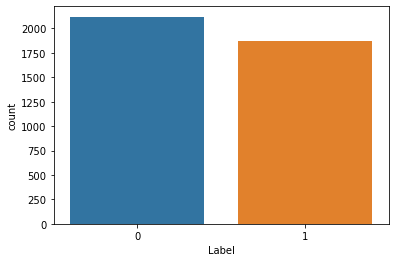

In [9]:
# class imbalance
sns.countplot(x= df['Label'])

In [10]:
df.rename(columns = {'URLs' : 'Author_website'},inplace=True)

In [11]:
df.columns

Index(['Author_website', 'Headline', 'Body', 'Label'], dtype='object')

In [12]:
def extract_wesite(sample):
    k = sample.split('/')
    return k[2]

In [13]:
df['Author_website'] = df['Author_website'].apply(extract_wesite)

In [14]:
df['Author_website'].unique()

array(['www.bbc.com', 'www.reuters.com', 'www.nytimes.com', 'www.cnn.com',
       'beforeitsnews.com', 'www.activistpost.com', 'dailybuzzlive.com',
       'www.disclose.tv', 'abcnews.go.com', 'money.cnn.com',
       'edition.cnn.com', 'www.bbc.co.uk', 'inhealth.cnn.com',
       'bleacherreport.com', 'clarivate.com', 'reuters.com',
       'api.content-ad.net', 'cnn.it', 'thelab.bleacherreport.com'],
      dtype=object)

In [15]:
# theres one value which is not a website 'api.content-ad.net' and they are fake
df[df['Author_website']=='api.content-ad.net']

,Author_website,Headline,Body,Label
1742,api.content-ad.net,Eight Cars that are hard to Depreciate,Please follow and like us:\n \nYou will surely...,0
3244,api.content-ad.net,Eight Cars that are hard to Depreciate,Please follow and like us:\n \nYou will surely...,0


In [16]:
df.drop(df[df['Author_website']=='api.content-ad.net'].index,axis = 0,inplace =True)

In [17]:
df['Author_website'].unique()

array(['www.bbc.com', 'www.reuters.com', 'www.nytimes.com', 'www.cnn.com',
       'beforeitsnews.com', 'www.activistpost.com', 'dailybuzzlive.com',
       'www.disclose.tv', 'abcnews.go.com', 'money.cnn.com',
       'edition.cnn.com', 'www.bbc.co.uk', 'inhealth.cnn.com',
       'bleacherreport.com', 'clarivate.com', 'reuters.com', 'cnn.it',
       'thelab.bleacherreport.com'], dtype=object)

In [18]:
def func(x):
    map_website = {'www.bbc.com':'BBC', 'www.reuters.com':'REUTERS', 'www.nytimes.com':'NYTIMES', 'www.cnn.com':'CNN',
       'beforeitsnews.com':'BEFOREITNEWS', 'www.activistpost.com':'ACTIVISTPOST', 'dailybuzzlive.com':'DAILYBUZZLIVE',
       'www.disclose.tv':'DISCLOSE', 'abcnews.go.com':'ABCNEWS', 'money.cnn.com':'CNN',
       'edition.cnn.com':'CNN', 'www.bbc.co.uk':'BBC', 'inhealth.cnn.com':'CNN',
       'bleacherreport.com':'BLEACHERREPORT', 'clarivate.com':'CLARIVATE', 'reuters.com':'REAUTERS', 'cnn.it':'CNN',
       'thelab.bleacherreport.com':'BLEACHERREPORT'}
    if x in map_website.keys():
        return map_website[x]

In [19]:
df['Author_website']=df['Author_website'].apply(func)

In [20]:
df['Author_website'].unique()

array(['BBC', 'REUTERS', 'NYTIMES', 'CNN', 'BEFOREITNEWS', 'ACTIVISTPOST',
       'DAILYBUZZLIVE', 'DISCLOSE', 'ABCNEWS', 'BLEACHERREPORT',
       'CLARIVATE', 'REAUTERS'], dtype=object)

In [21]:
df.head()

,Author_website,Headline,Body,Label
0,BBC,Four ways Bob Corker skewered Donald Trump,Image copyright Getty Images\nOn Sunday mornin...,1
1,REUTERS,Linklater's war veteran comedy speaks to moder...,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1
2,NYTIMES,Trump’s Fight With Corker Jeopardizes His Legi...,The feud broke into public view last week when...,1
3,REUTERS,Egypt's Cheiron wins tie-up with Pemex for Mex...,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,1
4,CNN,Jason Aldean opens 'SNL' with Vegas tribute,"Country singer Jason Aldean, who was performin...",1


In [22]:
def clean_text(sample):
    sample = re.sub(r'[^\w\s]','',sample)
    sample = re.sub(r'\n','',sample)
    return sample

In [23]:
df['Body'] = df['Body'].apply(clean_text)
df['Headline'] = df['Headline'].apply(clean_text)

In [24]:
df.head()

,Author_website,Headline,Body,Label
0,BBC,Four ways Bob Corker skewered Donald Trump,Image copyright Getty ImagesOn Sunday morning ...,1
1,REUTERS,Linklaters war veteran comedy speaks to modern...,LONDON Reuters Last Flag Flying a comedydrama...,1
2,NYTIMES,Trumps Fight With Corker Jeopardizes His Legis...,The feud broke into public view last week when...,1
3,REUTERS,Egypts Cheiron wins tieup with Pemex for Mexic...,MEXICO CITY Reuters Egypts Cheiron Holdings L...,1
4,CNN,Jason Aldean opens SNL with Vegas tribute,Country singer Jason Aldean who was performing...,1


In [25]:
df.iloc[0,2]

'Image copyright Getty ImagesOn Sunday morning Donald Trump went off on a Twitter tirade against a member of his own partyThis in itself isnt exactly huge news Its far from the first time the president has turned his rhetorical cannons on his own ranksThis time however his attacks were particularly biting and personal He essentially called Tennessee Senator Bob Corker the chair of the powerful Senate Foreign Relations Committee a coward for not running for reelectionHe said Mr Corker begged for the presidents endorsement which he refused to give He wrongly claimed that Mr Corkers support of the Iranian nuclear agreement was his only political accomplishmentUnlike some of his colleagues Mr Corker  free from having to worry about his immediate political future  didnt hold his tongueSkip Twitter post by SenBobCorker Its a shame the White House has become an adult day care center Someone obviously missed their shift this morning  Senator Bob Corker SenBobCorker October 8 2017 ReportThat wa

In [26]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [27]:
lemmatizer = WordNetLemmatizer()

In [28]:
stop_words = stopwords.words('english')
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [29]:
def clean(sample):
    filter_sentance = ''
    # Tokenization
    words = nltk.word_tokenize(sample)
    
    # Stopwords removal
    words = [w for w in words if not w in stop_words]
    
    # Lemmatization
    for words in words:
        filter_sentance = filter_sentance  + ' ' +str(lemmatizer.lemmatize(words)).lower()
        
    return filter_sentance    

In [30]:
df['Headline'] = df['Headline'].apply(clean)
df['Body'] = df['Body'].apply(clean)

In [31]:
df.iloc[0,2]

' image copyright getty imageson sunday morning donald trump went twitter tirade member partythis isnt exactly huge news its far first time president turned rhetorical cannon ranksthis time however attack particularly biting personal he essentially called tennessee senator bob corker chair powerful senate foreign relations committee coward running reelectionhe said mr corker begged president endorsement refused give he wrongly claimed mr corkers support iranian nuclear agreement political accomplishmentunlike colleague mr corker free worry immediate political future didnt hold tongueskip twitter post senbobcorker its shame white house become adult day care center someone obviously missed shift morning senator bob corker senbobcorker october 8 2017 reportthat wasnt end though he spoke new york times really let president here four choice quote tennessee senator interview times particularly damningi dont know president tweet thing true you know everyone know doesyou cant really sugarcoat 

In [32]:
df.iloc[0,1]

' four way bob corker skewered donald trump'

In [33]:
df =df.sample(frac=1,).reset_index()

In [34]:
df.drop(columns=['index'],inplace = True)

In [35]:
df.head()

,Author_website,Headline,Body,Label
0,BEFOREITNEWS,nick folks days tampa numbered buccaneers bri...,nick folks days tampa numbered buccaneers bri...,0
1,BEFOREITNEWS,california doubles down stupidity is now a sa...,california doubles down stupidity is now a sa...,0
2,BEFOREITNEWS,where is president trumps sense of compassion,a potato battery can light room over month di...,0
3,BEFOREITNEWS,report jets sign running backreturn man trava...,report jets sign running backreturn man trava...,0
4,BEFOREITNEWS,jake arrieta say feel good ahead game 4 start...,jake arrieta say feel good ahead game 4 start...,0


In [36]:
df.tail()

,Author_website,Headline,Body,Label
3981,ACTIVISTPOST,us missile machinations undoes nonproliferati...,by ulson gunnarwhen come nuclear weapon upon ...,0
3982,BEFOREITNEWS,929 through 40 hbd cannonball paul camnitz cl...,red flag warning these california wildfires a...,0
3983,BEFOREITNEWS,107 chuck axed hbd brickyard adam moonlight a...,an embattled pharmaceutical company that sell...,0
3984,ACTIVISTPOST,msm ignores videos of syrians celebrating saa...,by brandon turbevillewhile western medium lam...,0
3985,BBC,facebook confirms russia ad instagram,image copyright getty imagesfacebook confirme...,1


In [37]:
df.to_csv('modeling_data/cleaned_data.csv',index=False)